In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from joblib import dump
from src.models import eval_model as evm
from src.models import eval_baseline as evb
from sklearn.utils import resample
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score , cross_validate 
%load_ext autoreload
%autoreload 2

In [5]:
from sklearn.model_selection import train_test_split
def read_and_split_data(file):
    df = pd.read_csv(file)
    x=df.drop(['TARGET_5Yrs','TARGET_5Yrs_Inv'],axis=1)
    y=df['TARGET_5Yrs_Inv']
    x_data , x_test ,y_data,  y_test = train_test_split(x, y, test_size=0.2, random_state = 8, stratify=y)
    x_train , x_val , y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state = 8, stratify=y_data)
    print('y',y.value_counts())
    print('y_train',y_train.value_counts())
    print('y_val', y_val.value_counts())
    print('y_test',y_test.value_counts())
    return x_data, x_train , x_val ,x_test,y_data , y_train, y_val,   y_test

In [6]:
x_data , x_test ,y_data,  y_test = read_and_split_data("../data/processed/df_cleaned_downsampled_nba_prediction.csv")

y 0    1331
1    1331
Name: TARGET_5Yrs_Inv, dtype: int64
x_data GP   MIN   PTS   FGM  FGA   3P Made  3PA  FTM  FTA  OREB  DREB  REB   AST  STL  BLK  TOV  CALC3P%    CALCFG%    CALCFT%  
69   22.8  9.4   3.8  8.9   0.9      2.7  1.2  1.7  0.4   2.0   2.3   2.6  0.8  0.2  1.2  33.333333  42.696629  70.588235    3
57   10.6  3.2   1.1  3.4   1.2      3.3  0.6  0.7  0.2   0.5   0.7   1.8  0.5  0.0  0.5  36.363636  32.352941  85.714286    3
94   43.0  15.4  6.3  12.8  0.1      0.3  2.5  3.6  3.6   7.8   11.3  2.8  0.6  1.0  2.7  33.333333  49.218750  69.444444    3
75   19.9  9.6   3.1  7.9   0.6      2.3  2.5  2.8  0.4   1.7   2.1   3.7  1.1  0.3  1.4  26.086957  39.240506  89.285714    3
82   28.2  9.6   3.8  9.6   0.3      1.4  1.8  2.8  0.6   3.2   3.8   4.9  1.5  0.2  2.9  21.428571  39.583333  64.285714    3
                                                                                                                            ..
51   15.0  5.1   2.0  5.8   0.0      0.0  0.7  0.9 

In [243]:
n_estimators = [5,25,50,100,150,200,250,300,350,450,550,650,750,850]
max_depth= [2, 6, 12, 14, 25, 50 ]
min_samples_leaf=[500,550,560,570,580,590,600,700]
# 1,2,3,5,10,15,20,30,40,50,100,
max_features=[2,4,6,8,10,12,14]


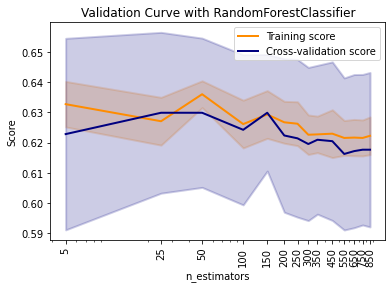

In [248]:
param_range=n_estimators
from sklearn.model_selection import validation_curve
train_scores, valid_scores = validation_curve(estimator=RandomForestClassifier(random_state=8,max_depth=2,min_samples_leaf=535,max_features=10,n_estimators=150),param_name='n_estimators',param_range=n_estimators,X=x_data,y=y_data,cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks

plt.title("Validation Curve with RandomForestClassifier")
plt.xlabel("n_estimators")
plt.ylabel("Score")
# plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)
plt.xticks(ticks=param_range,labels=param_range,rotation = 'vertical')
plt.legend(loc="best")
plt.show()

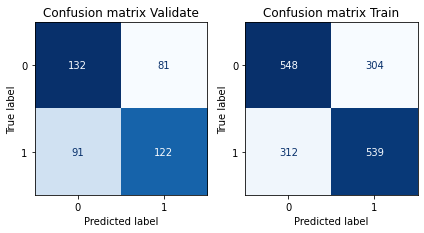

RandomForestClassifier(max_depth=2, max_features=10, min_samples_leaf=535,
                       n_estimators=150, random_state=8)


(RandomForestClassifier(max_depth=2, max_features=10, min_samples_leaf=535,
                        n_estimators=150, random_state=8),
 0.683531663935828,
 0.6501575965967952)

In [249]:
evm.eval_model(RandomForestClassifier(random_state=8,max_depth=2,min_samples_leaf=535,max_features=10,n_estimators=150),x_train,y_train,x_val,y_val)

In [ ]:
evm.eval_model(RandomForestClassifier(random_state=8,max_depth=2,min_samples_leaf=300,max_features=2,n_estimators=50),x_train,y_train,x_val,y_val)

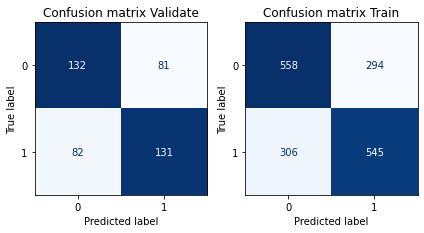

RandomForestClassifier(max_features=8, min_samples_leaf=550, n_estimators=250,
                       random_state=8)


(RandomForestClassifier(max_features=8, min_samples_leaf=550, n_estimators=250,
                        random_state=8),
 0.6840757628418375,
 0.6571116841896449)

In [235]:
evm.eval_model(RandomForestClassifier(random_state=8,min_samples_leaf=550,max_features=8,n_estimators=250),x_train,y_train,x_val,y_val)

In [200]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))
    t_size=train_sizes

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")
    
    axes[0].set_xticks(train_sizes, minor=False)
    axes[0].set_xticklabels(train_sizes, fontdict=None, minor=False)
    
    axes[1].set_xticks(train_sizes, minor=False)
    axes[1].set_xticklabels(train_sizes, fontdict=None, minor=False)
    
#     axes[2].set_xticks(train_sizes, minor=False)
#     axes[2].set_xticklabels(train_sizes, fontdict=None, minor=False)
    print(t_size)
    return plt

[0.1   0.325 0.55  0.775 1.   ]


<module 'matplotlib.pyplot' from 'c:\\users\\xauspi\\.virtualenvs\\kaggle_assignment-dq2gjalz\\lib\\site-packages\\matplotlib\\pyplot.py'>

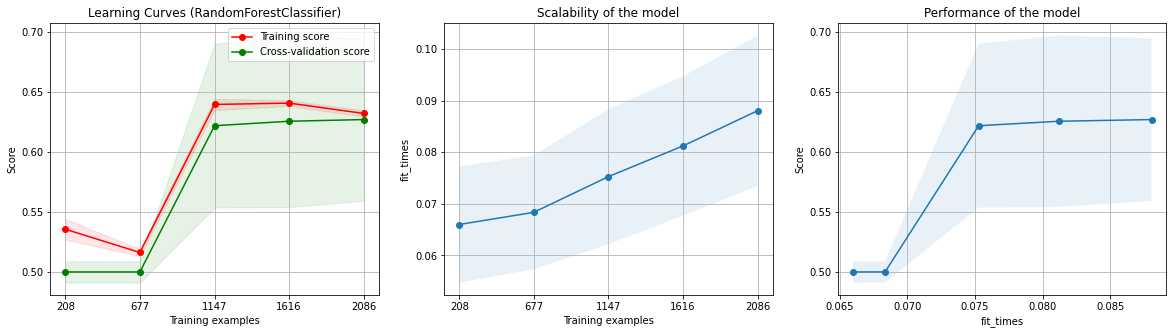

In [201]:
title = "Learning Curves (RandomForestClassifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
# cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
cv=50
estimator = RandomForestClassifier(random_state=8,max_depth=2,min_samples_leaf=300,max_features=2,n_estimators=50)
plot_learning_curve(estimator, title, X=x_data, y=y_data, 
                    cv=cv, n_jobs=4)

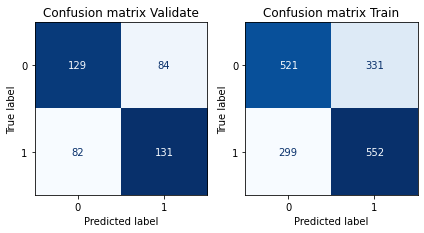

RandomForestClassifier(max_depth=2, max_features=2, min_samples_leaf=300,
                       random_state=8)


(RandomForestClassifier(max_depth=2, max_features=2, min_samples_leaf=300,
                        random_state=8),
 0.6887333598141926,
 0.6579161982851728)

In [159]:
evm.eval_model(RandomForestClassifier(random_state=8,max_depth=2,min_samples_leaf=300,max_features=2),x_train,y_train,x_val,y_val)

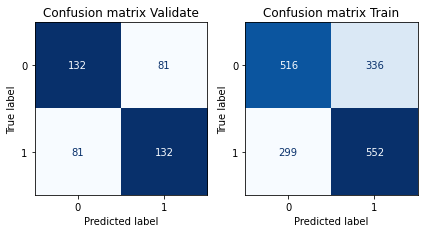

RandomForestClassifier(max_depth=2, max_features=2, min_samples_leaf=300,
                       n_estimators=50, random_state=8)


(RandomForestClassifier(max_depth=2, max_features=2, min_samples_leaf=300,
                        n_estimators=50, random_state=8),
 0.6920503632842886,
 0.6620269346910886)

In [158]:
evm.eval_model(RandomForestClassifier(random_state=8,max_depth=2,min_samples_leaf=300,max_features=2,n_estimators=50),x_train,y_train,x_val,y_val)

In [202]:
print(__doc__)

Automatically created module for IPython interactive environment
